**March** 8 - 12, 2021

- Analysis of the XRD data using the PCA/NMF, manifold learning, and VAE
- Data from Oliver Hoidn <ohoidn@gmail.com> and Apurva Mehta, SLAC
- Additional info can be found at https://github.com/aoluwade/SLAC2020_SSRL-Internship/tree/master/Jupyter%20notebooks
- As a part of collboration under the NSRC-AI project, PI Alex Hexemer
- Workflow by Sergei V. Kalinin
- VAE realized via AtomAI by M. Ziatdinov
- Shift 1D VAE realized in PyroVED by M. Ziatdonov specifically for this project 
- Comment: ask for CNMS proposal (for shift VAE)

# Data load

In [1]:
# !git clone https://github.com/hoidn/xrd_clustering.git

# cd xrd_clustering

# !git submodule update --init --recursive

# cd ..

# cd xrd_clustering

# !pip install dataclasses==0.6

# !pip install gpflow

# !python setup.py install

fatal: destination path 'xrd_clustering' already exists and is not an empty directory.


In [1]:
from xrdc import xrdutils

In [10]:
# #!gdown --id 1wu0BW4CCpuhNV_3lk4vB40fpzkyuMqpz
# #!gdown --id 1thrXCE2X3Xr3jRK58i8b4NmPwWrBcJdo

# !gdown --id 1wu0BW4CCpuhNV_3lk4vB40fpzkyuMqpz
# !gdown --id 1thrXCE2X3Xr3jRK58i8b4NmPwWrBcJdo

Downloading...
From: https://drive.google.com/uc?id=1wu0BW4CCpuhNV_3lk4vB40fpzkyuMqpz
To: /content/xrd_clustering/TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D.dgrid.pkl
2.28MB [00:00, 71.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1thrXCE2X3Xr3jRK58i8b4NmPwWrBcJdo
To: /content/xrd_clustering/TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D_y.npy
100% 1.54k/1.54k [00:00<00:00, 1.29MB/s]


In [11]:
# !wget https://raw.githubusercontent.com/aoluwade/SLAC2020_SSRL-Internship/master/Clustering/data_grid.py

--2021-03-29 23:47:41--  https://raw.githubusercontent.com/aoluwade/SLAC2020_SSRL-Internship/master/Clustering/data_grid.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6593 (6.4K) [text/plain]
Saving to: ‘data_grid.py’

data_grid.py        100%[===================>]   6.44K  --.-KB/s    in 0s      

2021-03-29 23:47:42 (67.5 MB/s) - ‘data_grid.py’ saved [6593/6593]



In [2]:
import dill
import numpy as np
import matplotlib.pyplot as plt

In [13]:
with open("TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D.dgrid.pkl", "rb") as f:
    dgrid = dill.load(f)

In [14]:
q = dgrid.data[1][:,0] # q grid
X = dgrid.get_data_array() # array of XRD patterns
Y = np.load("TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D_y.npy") # corresponding ground truth phase labels

(177, 800)


In [11]:
X.shape, Y.shape, q.shape

((177, 800), (177,), (800,))

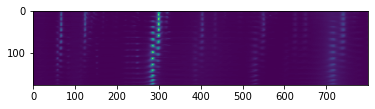

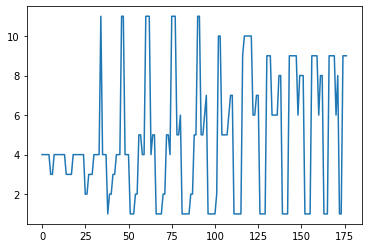

In [ ]:
plt.imshow(X)
plt.show()

plt.plot(Y)

In [ ]:
#!gdown --id 1M1j8PJjBl01LyaNmrnCw8WW5s6U_qCv-
!gdown --id 1M1j8PJjBl01LyaNmrnCw8WW5s6U_qCv-

Downloading...
From: https://drive.google.com/uc?id=1M1j8PJjBl01LyaNmrnCw8WW5s6U_qCv-
To: /content/tinisn.tar.gz
41.1MB [00:00, 53.7MB/s]


Let's also make coordinate array for plotting

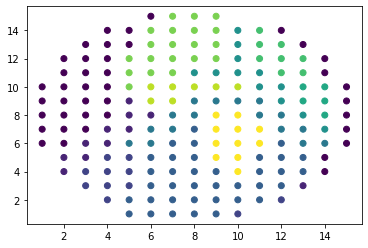

In [ ]:
coords = []

for i in range(177):
  coords.append(dgrid.coord(i))

coords = np.array(coords)
plt.scatter(coords[:,0], coords[:,1], c = Y)

# PCA/NMF

In [ ]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn import decomposition

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
d1, d2 = X.shape
X_vec = X.copy()

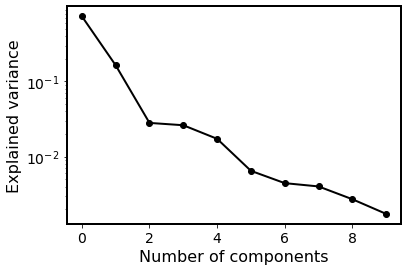

In [ ]:
from pylab import *
ax = gca()

pca = decomposition.PCA()
pca.fit(X_vec)
#plt.figure(figsize=(6, 4), dpi = 96)
plt.plot(pca.explained_variance_ratio_[0:10], '-o', linewidth=2, c = 'black')
plt.xlabel('Number of components', fontsize = 16)
plt.ylabel('Explained variance', fontsize = 16)

plt.tick_params(labelsize = 14)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)

plt.yscale('log')

In [ ]:
# Select number of components
nc = 12 

# Select decomposition type ('PCA' or 'NMF')
decomposition_type = 'PCA'

# Run decomposition
if decomposition_type == 'NMF':
    clf = decomposition.NMF(n_components=nc, random_state=42)
elif decomposition_type == 'PCA':
    clf = decomposition.PCA(n_components=nc, random_state=42)
else:
    raise NotImplementedError('Available methods: "PCA", "NMF"')
X_vec_t = clf.fit_transform(X_vec)
components = clf.components_
print(components.shape, X_vec_t.shape)

(12, 800) (177, 12)


NUMBER OF COMPONENTS: 12
Components...


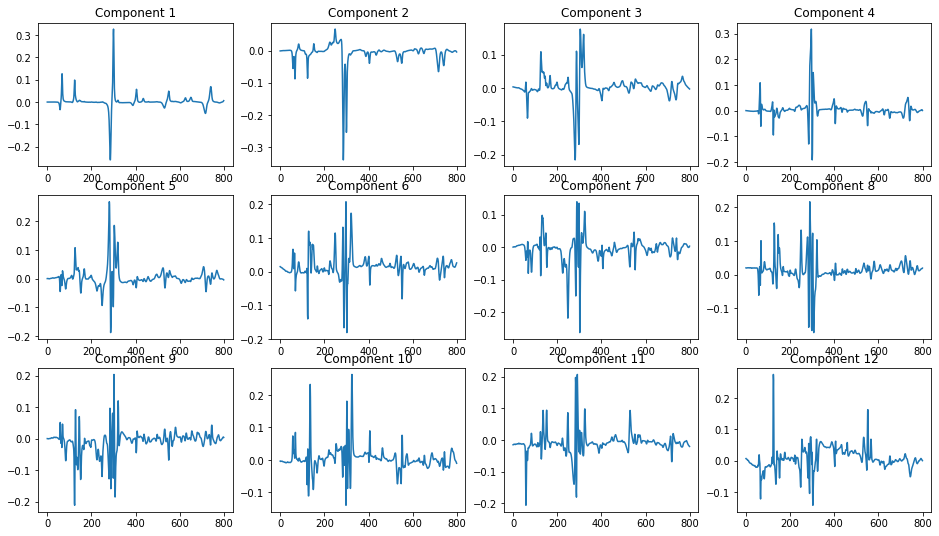

Abundance maps...


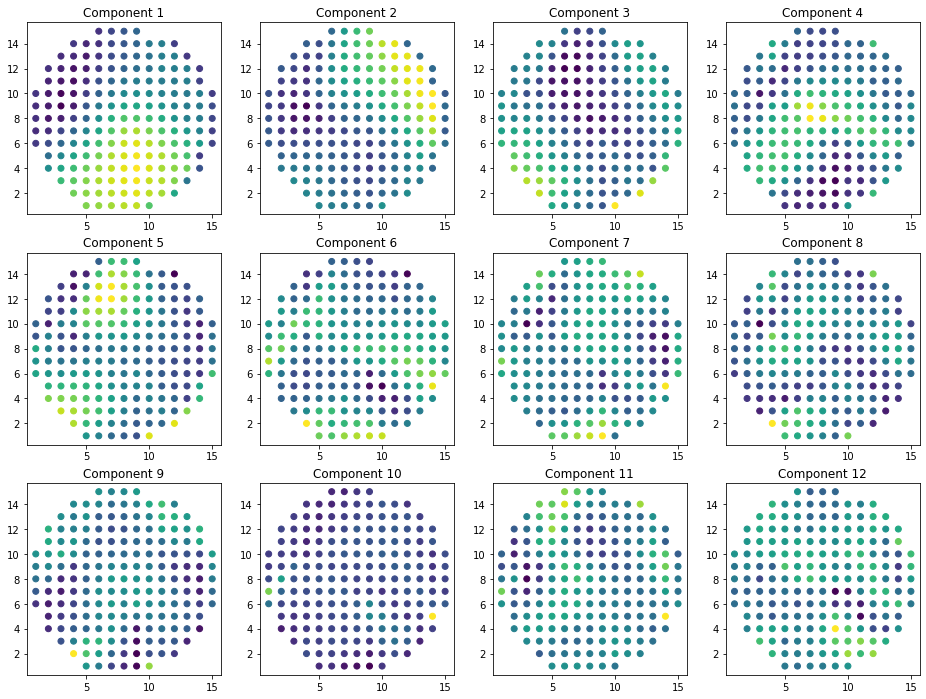

In [ ]:
rows = int(np.ceil(float(nc)/5))
cols = int(np.ceil(float(nc)/rows))

print('NUMBER OF COMPONENTS: ' + str(nc))
print('Components...')
gs1 = gridspec.GridSpec(rows, cols)
fig1 = plt.figure(figsize = (4*cols, 3.5*(1+rows)//1.5))   
for i in range(nc):
    ax1 = fig1.add_subplot(gs1[i])
    j = 0
    ax1.plot(components[i])
    ax1.set_title('Component ' + str(i + 1))
plt.show()

print('Abundance maps...')
gs2 = gridspec.GridSpec(rows, cols)
fig2 = plt.figure(figsize = (4*cols, 4*(1+rows//1.5)))   
for i in range(nc):
    ax2 = fig2.add_subplot(gs2[i])
    #ax2.plot(X_vec_t[:, i])
    plt.scatter(coords[:,0], coords[:,1], c = X_vec_t[:, i])
    ax2.set_title('Component ' + str(i + 1))
plt.show()

In [ ]:
coords.shape

(177, 2)

# Clustering in different spaces

A
B
C
D


Text(0.5, 1.0, 'ISO')

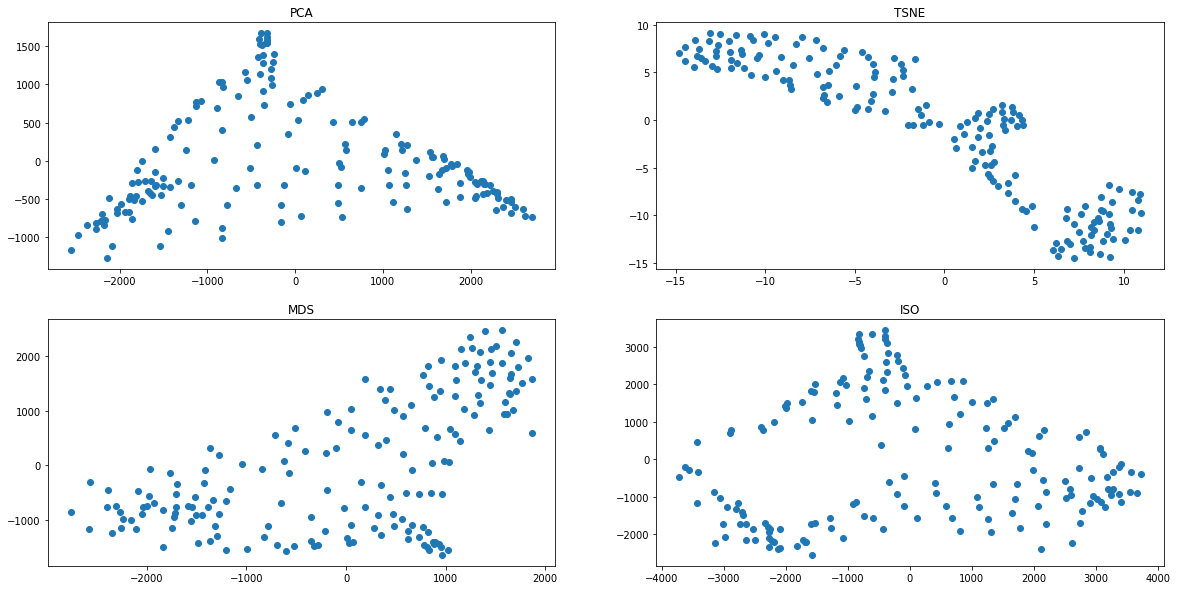

In [ ]:
z = X.copy()

import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE, MDS, Isomap
import matplotlib.pyplot as plt

z_pca = PCA(n_components = 2).fit_transform(z)
print('A')
z_tsne = TSNE(learning_rate=200).fit_transform(z)
print('B')
z_MDS = MDS(n_components = 2).fit_transform(z)
print('C')
z_ISO = Isomap(n_components = 2).fit_transform(z)
print('D')

plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('PCA')
plt.scatter(z_pca [:, 0], z_pca [:, 1])

plt.subplot(222)
plt.scatter(z_tsne[:, 0], z_tsne[:, 1])
plt.title('TSNE')

plt.subplot(223)
plt.scatter(z_MDS[:, 0], z_MDS[:, 1])
plt.title('MDS')

plt.subplot(224)
plt.scatter(z_ISO[:, 0], z_ISO[:, 1])
plt.title('ISO')

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=8) #diag
gmm_zpp = gmm.fit_predict(z)

Text(0.5, 1.0, 'ISO')

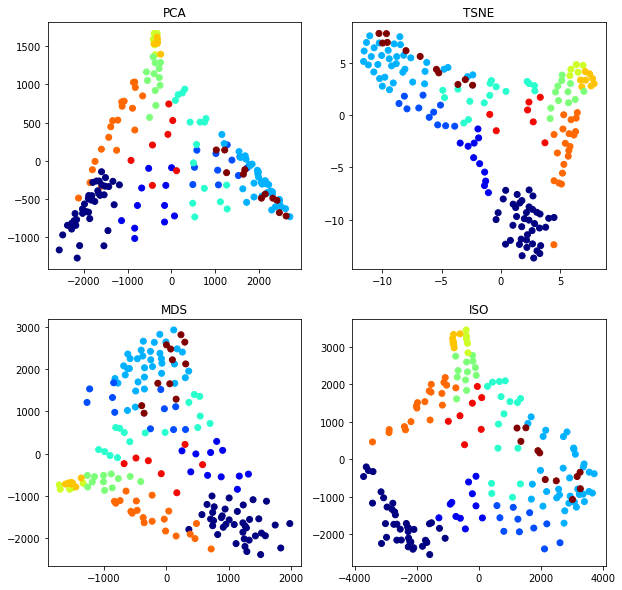

In [ ]:
color_arr = Y #gmm_zpp # Y

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.title('PCA')
plt.scatter(z_pca [:, 0], z_pca [:, 1], c = color_arr, cmap = 'jet') #kmeans.labels_

plt.subplot(222)
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c = color_arr, cmap = 'jet')
plt.title('TSNE')

plt.subplot(223)
plt.scatter(z_MDS[:, 0], z_MDS[:, 1], c = color_arr, cmap = 'jet')
plt.title('MDS')

plt.subplot(224)
plt.scatter(z_ISO[:, 0], z_ISO[:, 1], c = color_arr, cmap = 'jet')
plt.title('ISO')

# 1D VAE

(177, 800)


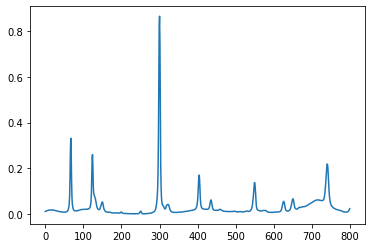

In [ ]:
# print(feature_arr.shape)

X_train = X.copy()

# subtract average

# X_train = X_train - X_train.mean(axis = 0)


X_train_max = X_train.max()
X_train_min = X_train.min()

X_train = (X_train - X_train_min)/(X_train_max - X_train_min)

print(X_train.shape)

plt.plot(X_train[10,:])

In [ ]:
!pip install -q atomai

     |████████████████████████████████| 133kB 7.2MB/s 
     |████████████████████████████████| 194kB 11.4MB/s 
     |████████████████████████████████| 870kB 12.5MB/s 


In [ ]:
import numpy as np
import cv2

from sklearn import decomposition
from skimage import io

import pandas as pd
import seaborn as sns

import atomai as aoi
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
X_train = np.expand_dims(X_train, axis = 2)
print(X_train.shape)

(177, 800, 1)


In [ ]:
# Try augmentation

X_train_large = []
X_temp = np.squeeze(X_train)
for i, obj in enumerate(X_temp):
  for j in range(100):
    X_train_large.append(obj+np.random.normal(0, 0.01, len(obj)))

X_train_large = np.array(X_train_large)
X_train_large = np.expand_dims(X_train_large, axis = 2)
print(X_train_large.shape)

(17700, 800, 1)


In [ ]:
input_dim = (X_train.shape[1], 1)

# Intitialize model
vae = aoi.models.VAE(input_dim, latent_dim=2, 
                        numlayers_encoder=3, numhidden_encoder=512,
                        numlayers_decoder=3, numhidden_decoder=512,
                        skip=True) 
# Train
vae.fit(X_train_large, training_cycles=600, batch_size=32, loss="mse")

Epoch: 1/600, Training loss: 0.6098
Epoch: 2/600, Training loss: 0.5506
Epoch: 3/600, Training loss: 0.5478
Epoch: 4/600, Training loss: 0.5465
Epoch: 5/600, Training loss: 0.5459
Epoch: 6/600, Training loss: 0.5458
Epoch: 7/600, Training loss: 0.5448
Epoch: 8/600, Training loss: 0.5452
Epoch: 9/600, Training loss: 0.5446
Epoch: 10/600, Training loss: 0.5440
Epoch: 11/600, Training loss: 0.5445
Epoch: 12/600, Training loss: 0.5437
Epoch: 13/600, Training loss: 0.5442
Epoch: 14/600, Training loss: 0.5436
Epoch: 15/600, Training loss: 0.5436
Epoch: 16/600, Training loss: 0.5434
Epoch: 17/600, Training loss: 0.5431
Epoch: 18/600, Training loss: 0.5433
Epoch: 19/600, Training loss: 0.5431
Epoch: 20/600, Training loss: 0.5430
Epoch: 21/600, Training loss: 0.5431
Epoch: 22/600, Training loss: 0.5432
Epoch: 23/600, Training loss: 0.5429
Epoch: 24/600, Training loss: 0.5428
Epoch: 25/600, Training loss: 0.5428
Epoch: 26/600, Training loss: 0.5423
Epoch: 27/600, Training loss: 0.5424
Epoch: 28/

KeyboardInterrupt: ignored

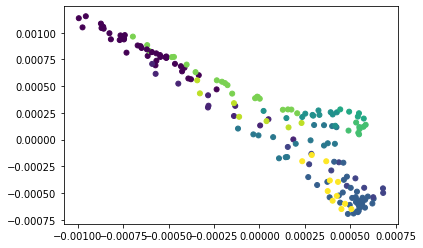

In [ ]:
z_mean, z_sd = vae.encode(X_train)
plt.scatter(z_mean[:,0], z_mean[:,1], c = Y, s = 25)

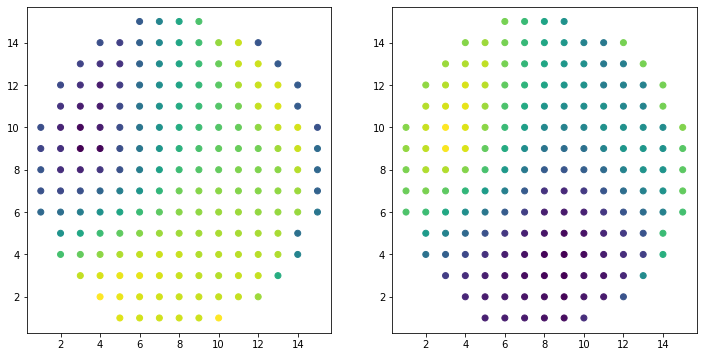

In [ ]:
# Plot on a grid

_, (ax0, ax1) = plt.subplots(1,2, figsize = (12, 6))
ax0.scatter(coords[:,0], coords[:,1], c = z_mean[:,0])
ax1.scatter(coords[:,0], coords[:,1], c = z_mean[:,1])

In [ ]:
z_mean.shape

(177, 2)

# 1D jVAE

In [ ]:
input_dim = (X_train.shape[1], 1)

# Intitialize model
jvae = aoi.models.jVAE(input_dim, latent_dim=2, discrete_dim=[4],
                        numlayers_encoder=3, numhidden_encoder=512,
                        numlayers_decoder=3, numhidden_decoder=512,
                        skip=False) 
# Train
jvae.fit(X_train, training_cycles=40, batch_size=32, loss="ce")

Epoch: 1/600, Training loss: 551.8162
Epoch: 2/600, Training loss: 536.9695
Epoch: 3/600, Training loss: 514.0093
Epoch: 4/600, Training loss: 475.4221
Epoch: 5/600, Training loss: 418.8889
Epoch: 6/600, Training loss: 346.7376
Epoch: 7/600, Training loss: 274.0083
Epoch: 8/600, Training loss: 208.4828
Epoch: 9/600, Training loss: 162.9473
Epoch: 10/600, Training loss: 133.0532
Epoch: 11/600, Training loss: 116.0818
Epoch: 12/600, Training loss: 105.2320
Epoch: 13/600, Training loss: 98.8708
Epoch: 14/600, Training loss: 95.3662
Epoch: 15/600, Training loss: 92.6482
Epoch: 16/600, Training loss: 90.2715
Epoch: 17/600, Training loss: 89.0946
Epoch: 18/600, Training loss: 88.2122
Epoch: 19/600, Training loss: 87.6318
Epoch: 20/600, Training loss: 87.0517
Epoch: 21/600, Training loss: 86.7200
Epoch: 22/600, Training loss: 86.5909
Epoch: 23/600, Training loss: 85.6981
Epoch: 24/600, Training loss: 85.5934
Epoch: 25/600, Training loss: 85.9381
Epoch: 26/600, Training loss: 85.4085
Epoch: 27

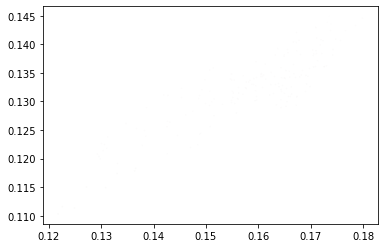

In [ ]:
a, b, c = jvae.encode(X_train)
plt.scatter(a[:,0], a[:,1], c = c, s = 1)

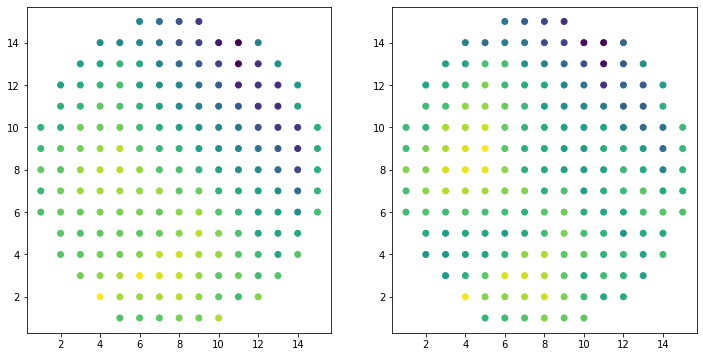

In [ ]:
# Plot on a grid

_, (ax0, ax1) = plt.subplots(1,2, figsize = (12, 6))
ax0.scatter(coords[:,0], coords[:,1], c = a[:,0])
ax1.scatter(coords[:,0], coords[:,1], c = a[:,1])

(177,)


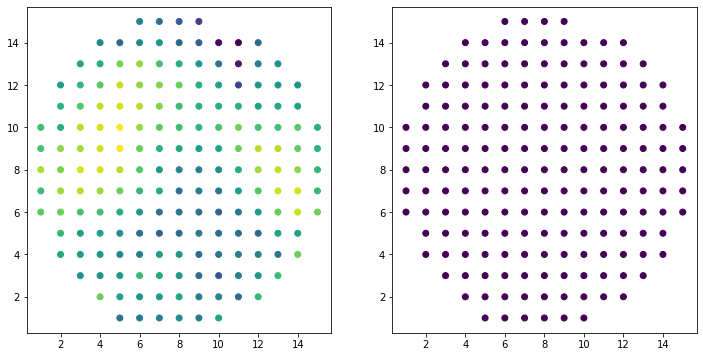

In [ ]:
ci = np.array([np.argmax(cl) for cl in c])
print(ci.shape)

# Plot on a grid 

_, (ax0, ax1) = plt.subplots(1,2, figsize = (12, 6))
ax0.scatter(coords[:,0], coords[:,1], c = c[:,0])
ax1.scatter(coords[:,0], coords[:,1], c = ci)

In [ ]:
ci

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

# Shift VAE (Pyro)

In [4]:
!pip install git+https://github.com/ziatdinovmax/pyroved
#     Found existing installation: torch 1.0.1
#     Found existing installation: torchvision 0.2.1

  Cloning https://github.com/ziatdinovmax/pyroved to /private/var/folders/lv/xswjq9nn5f3_lrmyfhgm4tkm0000gn/T/pip-req-build-pikzo3rn
     |████████████████████████████████| 13.2 MB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 119.5 MB 295 kB/s eta 0:00:012    |██████████████████▏             | 68.0 MB 12.2 MB/s eta 0:00:05
  Created wheel for pyroved: filename=pyroved-0.0.3-py3-none-any.whl size=34480 sha256=9edd4eaea9fc43d82f386c4013d57a908fd4f9248e2760c2661b8301087ca543
  Stored in directory: /private/var/folders/lv/xswjq9nn5f3_lrmyfhgm4tkm0000gn/T/pip-ephem-wheel-cache-r7bxvjtc/wheels/8a/c0/fd/789c9c3290ecff8fd3f1ecb40f758149a91ce6732530676285
Successfully built pyroved
  Attempting uninstall: torch
    Found existing installation: torch 1.0.1
    Uninstalling torch-1.0.1:
      Successfully uninstalled torch-1.0.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.2.1
    Uninstalling torchvision-0.2.1:
      Successfully uninstalled

In [3]:
import pyroved as pv
import torch
import matplotlib.pyplot as plt

In [ ]:
# Try augmentation

X_train_large = []
X_temp = X.copy()

X_temp = (X_temp-X_temp.min())/(X_temp.max()-X_temp.min())

for i, obj in enumerate(X_temp):
  for j in range(100):
    X_train_large.append(obj+np.random.normal(0, 0.01, len(obj)))

X_train_large = np.array(X_train_large)
X_train_large = np.expand_dims(X_train_large, axis = 2)
print(X_train_large.shape, X_train_large.min(), X_train_large.max())

(17700, 800, 1) -0.04543126732206724 1.019321628311238


In [ ]:
train_data = torch.tensor(np.squeeze(X_train_large)).float()
print(train_data.shape)
train_loader = pv.utils.init_dataloader(train_data.unsqueeze(1), batch_size=32)

torch.Size([17700, 800])


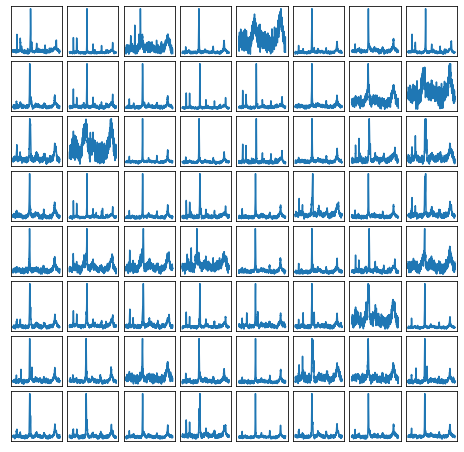

In [ ]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

x = torch.linspace(-10, 10, 800)
for ax, (y,) in zip(axes.flat, train_loader):
    #print(y.shape)
    ax.plot(x, y[0, 0])

Train a regular VAE:

In [ ]:
pv.models.trVAE

NameError: ignored

In [ ]:
in_dim = (800,)

# Initialize vanilla VAE
vae = pv.models.trVAE(in_dim, latent_dim=2, coord=0, seed=0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(vae)

# Train for n epochs:
for e in range(150):
    trainer.step(train_loader)
    trainer.print_statistics()

Epoch: 1 Training loss: 96.6332
Epoch: 2 Training loss: 84.0153
Epoch: 3 Training loss: 82.8003
Epoch: 4 Training loss: 81.9298
Epoch: 5 Training loss: 81.8278
Epoch: 6 Training loss: 81.7825
Epoch: 7 Training loss: 81.7472
Epoch: 8 Training loss: 81.7375
Epoch: 9 Training loss: 81.7264
Epoch: 10 Training loss: 81.7070
Epoch: 11 Training loss: 81.6998
Epoch: 12 Training loss: 81.6851
Epoch: 13 Training loss: 81.6875
Epoch: 14 Training loss: 81.6765
Epoch: 15 Training loss: 81.6686
Epoch: 16 Training loss: 81.6581
Epoch: 17 Training loss: 81.6580
Epoch: 18 Training loss: 81.6581
Epoch: 19 Training loss: 81.6378
Epoch: 20 Training loss: 81.6447
Epoch: 21 Training loss: 81.6383
Epoch: 22 Training loss: 81.6359
Epoch: 23 Training loss: 81.6363
Epoch: 24 Training loss: 81.6208
Epoch: 25 Training loss: 81.6385
Epoch: 26 Training loss: 81.6297
Epoch: 27 Training loss: 81.6237
Epoch: 28 Training loss: 81.6129
Epoch: 29 Training loss: 81.6130
Epoch: 30 Training loss: 81.6107
Epoch: 31 Training 

Encode the training data into the latent space:

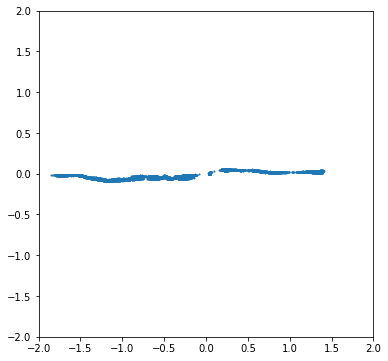

In [ ]:
z_mean, z_sd = vae.encode(train_data)
plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, -2], z_mean[:, -1], s=1)
plt.xlim(-2, 2)
plt.ylim(-2, 2);

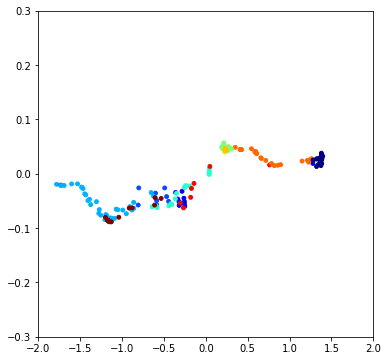

In [ ]:
X_norm = (X - X.min())/(X.max()-X.min())
train_data2 = torch.tensor(np.squeeze(X_norm)).float()

z_mean, z_sd = vae.encode(train_data2)
plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, -2], z_mean[:, -1], c = Y, s=15, cmap = 'jet')
plt.xlim(-2, 2)
plt.ylim(-0.3, 0.3);

Plot the learned manifold:

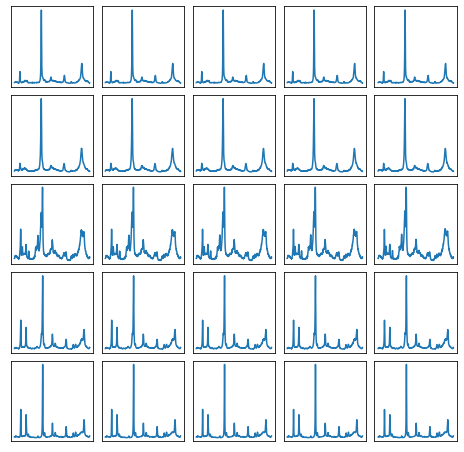

In [ ]:
vae.manifold2d(d=5);

Now train a shift-invariant VAE model (note that ```trVAE``` works both for 2D and 1D cases. For 2D case, ```coord=1``` corresponds to rotational invariance, ```coord=2``` corresponds to translational invariance, and ```coord=3``` - to both. For 1D case, we have only translational invariance so we get the same model for ```coord = 1, 2, 3``` )

In [ ]:
in_dim = (800,)

# Initialize shift-invariant VAE
shvae = pv.models.trVAE(in_dim, latent_dim=2, coord=1, seed=0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(shvae)

# Train for n epochs:
for e in range(250):
    trainer.step(train_loader)
    trainer.print_statistics()

Epoch: 1 Training loss: 98.9256
Epoch: 2 Training loss: 93.9033
Epoch: 3 Training loss: 89.5727
Epoch: 4 Training loss: 87.5133
Epoch: 5 Training loss: 87.1153
Epoch: 6 Training loss: 86.9890
Epoch: 7 Training loss: 86.9199
Epoch: 8 Training loss: 86.7810
Epoch: 9 Training loss: 86.4551
Epoch: 10 Training loss: 86.2172
Epoch: 11 Training loss: 86.1303
Epoch: 12 Training loss: 86.0358
Epoch: 13 Training loss: 85.9963
Epoch: 14 Training loss: 85.9622
Epoch: 15 Training loss: 85.8974
Epoch: 16 Training loss: 85.7800
Epoch: 17 Training loss: 85.5117
Epoch: 18 Training loss: 85.3093
Epoch: 19 Training loss: 85.2527
Epoch: 20 Training loss: 85.1876
Epoch: 21 Training loss: 85.1382
Epoch: 22 Training loss: 85.1110
Epoch: 23 Training loss: 85.0815
Epoch: 24 Training loss: 85.0526
Epoch: 25 Training loss: 85.0543
Epoch: 26 Training loss: 84.9960
Epoch: 27 Training loss: 84.9974
Epoch: 28 Training loss: 84.9814
Epoch: 29 Training loss: 84.9480
Epoch: 30 Training loss: 84.9344
Epoch: 31 Training 

Encode train data into the latent space:

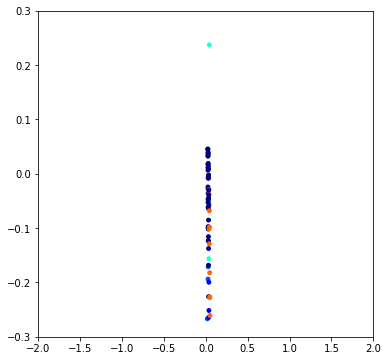

In [ ]:
X_norm = (X - X.min())/(X.max()-X.min())
train_data2 = torch.tensor(np.squeeze(X_norm)).float()

z_mean, z_sd = shvae.encode(train_data2)
plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, 1], z_mean[:, 2], c = Y, s=15, cmap = 'jet')
plt.xlim(-2, 2)
plt.ylim(-0.3, 0.3);

In [ ]:
z_mean.shape

torch.Size([177, 3])

Plot the learned manifold:

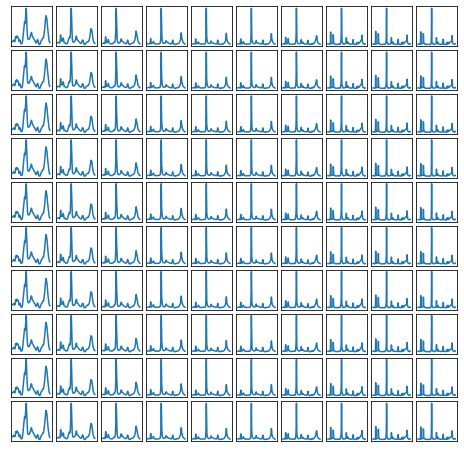

In [ ]:
shvae.manifold2d(d=10);

(0.29999999999999993, 15.7, 0.29999999999999993, 15.7)

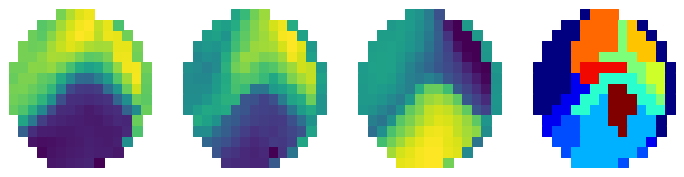

In [ ]:
# Plot on a grid

_, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize = (12, 3))
ax0.scatter(coords[:,0], coords[:,1], c = z_mean[:,0], marker = 's', s = 100)
ax0.axis('off')
ax1.scatter(coords[:,0], coords[:,1], c = z_mean[:,1], marker = 's', s = 100)
ax1.axis('off')
ax2.scatter(coords[:,0], coords[:,1], c = z_mean[:,2], marker = 's', s = 100)
ax2.axis('off')
ax3.scatter(coords[:,0], coords[:,1], c = Y, cmap = 'jet', marker = 's', s = 100)
ax3.axis('off')

In [ ]:
Y

array([ 4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  4,  2,  2,  3,  3,  3,  4,  4,  4,  4,
       11,  4,  4,  4,  1,  2,  2,  3,  3,  4,  4,  4, 11, 11,  4,  4,  4,
        1,  1,  1,  2,  2,  5,  5,  4,  4, 11, 11, 11,  4,  5,  5,  1,  1,
        1,  1,  2,  2,  5,  5,  4, 11, 11, 11,  5,  5,  6,  1,  1,  1,  1,
        1,  2,  2,  5,  5, 11, 11,  5,  5,  6,  7,  1,  1,  1,  1,  1,  2,
       10, 10,  5,  5,  5,  5,  6,  7,  7,  1,  1,  1,  1,  1,  9, 10, 10,
       10, 10, 10,  6,  6,  7,  7,  1,  1,  1,  1,  9,  9,  9,  6,  6,  6,
        6,  8,  8,  1,  1,  1,  1,  9,  9,  9,  9,  9,  6,  8,  8,  8,  1,
        1,  1,  1,  9,  9,  9,  9,  6,  8,  8,  1,  1,  1,  9,  9,  9,  9,
        6,  8,  1,  1,  9,  9,  9])

In [ ]:
z_mean[Y == 11]

tensor([[-2.0955e-01, -1.1258e-03,  1.3030e+00],
        [-2.0958e-01,  1.0684e-03,  1.2719e+00],
        [-2.1086e-01,  3.9503e-04,  1.2338e+00],
        [-2.0888e-01,  2.1471e-03,  1.1982e+00],
        [-1.9889e-01,  1.7135e-03,  1.1316e+00],
        [-1.8939e-01,  5.3858e-03,  9.2929e-01],
        [-1.8761e-01,  2.6142e-03,  1.0065e+00],
        [-1.8170e-01,  6.3539e-03,  8.8459e-01],
        [-1.7502e-01,  2.0097e-02,  6.3452e-01],
        [-1.6642e-01,  1.8296e-02,  6.9653e-01],
        [-1.5985e-01,  3.0469e-02,  4.3519e-01]])

In [ ]:
delta = 3.0025 - 2.995

In [ ]:
dq = (q[1] - q[0])
delta / dq

1.4999997856379026

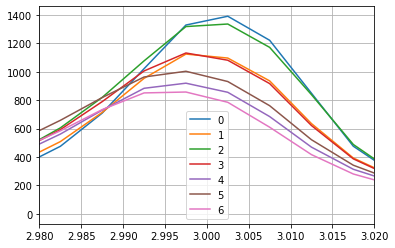

In [ ]:
[plt.plot(q, XX, label = i)  for (i, XX) in enumerate(X[Y == 11][4:])]
plt.xlim(2.98, 3.02)
plt.legend()
plt.grid()

(0.29999999999999993, 15.7, 0.29999999999999993, 15.7)

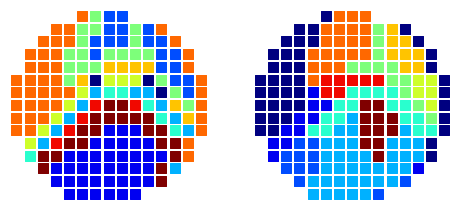

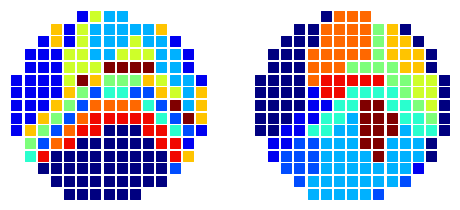

In [ ]:
z = z_mean[:,:2]
gmm = GaussianMixture(n_components=11) #diag
gmm_zpp = gmm.fit_predict(z)

_, (ax0, ax1) = plt.subplots(1,2, figsize = (8, 3.6))
ax0.scatter(coords[:,0], coords[:,1], c = gmm_zpp, cmap = 'jet', marker = 's', s = 100)
ax0.axis('off')
ax1.scatter(coords[:,0], coords[:,1], c = Y, cmap = 'jet', marker = 's', s = 100)
ax1.axis('off')


kmeans = KMeans(n_clusters=11, random_state=0).fit(z)
kmeans.labels_

_, (ax0, ax1) = plt.subplots(1,2, figsize = (8, 3.6))
ax0.scatter(coords[:,0], coords[:,1], c = kmeans.labels_, cmap = 'jet', marker = 's', s = 100)
ax0.axis('off')
ax1.scatter(coords[:,0], coords[:,1], c = Y, cmap = 'jet', marker = 's', s = 100)
ax1.axis('off')

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score as ami

In [ ]:
ami(gmm_zpp, Y), ami(kmeans.labels_, Y)

(0.6330419085805368, 0.5981220129649658)

# Bonus section - shift VAE on dummy data

In [15]:
!pip install git+https://github.com/ziatdinovmax/pyroved@dev

  Cloning https://github.com/ziatdinovmax/pyroved (to revision dev) to /tmp/pip-req-build-6vvoga4s
  Running command git clone -q https://github.com/ziatdinovmax/pyroved /tmp/pip-req-build-6vvoga4s
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
  Created wheel for pyroved: filename=pyroved-0.0.2-cp37-none-any.whl size=33462 sha256=42a17e135c5d8717c730dfad559e80a5efa3d2f58ca0fe99d5f8ee7f314c1ae7
  Stored in directory: /tmp/pip-ephem-wheel-cache-z6imq_81/wheels/9d/fe/79/43619ab9b429fdec44e0e8af0c0914ffdebff9083fbc138bda
Successfully built pyroved


In [4]:
import pyroved as pv
import torch
import matplotlib.pyplot as plt
import os
import numpy as np

Generate 1D spectra:

In [ ]:
!rm -r build/ dist/

In [30]:
#!python setup.py install
from importlib import reload
reload(xrdutils)

<module 'xrdc.xrdutils' from '/content/xrd_clustering/xrdc/xrdutils.py'>

In [5]:
# now part of xrdutils
# def mk_basis_patterns(n_basis):
#     return [xrdutils.rand_pattern() for _ in range(n_basis)]

# def gen_train_and_test_with_scales(n_basis, n_per_basis, prefix, same_basis = True, scale_type = 'shift'):
#     """
#     Generate random patterns and write the patterns, labels, and random scale/shift values to disk
#     """
#     basis = mk_basis_patterns(n_basis)
#     x_train, y_train, scale_vs_train = xrdutils.mk_simdata(basis, n_per_basis, -.6, .2, xrdutils.q_grid, scale_type = scale_type)
#     if not same_basis:
#         basis = mk_basis_patterns(n_basis)
#     x_val, y_val, scale_vs_val = xrdutils.mk_simdata(basis, n_per_basis, -.6, .2, xrdutils.q_grid, scale_type = scale_type)
#     os.makedirs(prefix + '/train', exist_ok=True)
#     os.makedirs(prefix + '/test', exist_ok=True)
    
#     scales_train = scale_vs_train.ravel()
#     scales_val = scale_vs_val.ravel()
    
#     np.save("{}x.npy".format(prefix + '/train/'), x_train)
#     np.save("{}y.npy".format(prefix + '/train/'), y_train)
#     np.save("{}x.npy".format(prefix + '/test/'), x_val)
#     np.save("{}y.npy".format(prefix + '/test/'), y_val)
    
#     np.save("{}scales.npy".format(prefix + '/train/'), scales_train)
#     np.save("{}scales.npy".format(prefix + '/test/'), scales_val)
#     return x_train, y_train, x_val, y_val, scales_train, scales_val

In [23]:
# a, b, c, d, scale_vs_train, scale_vs_val = gen_train_and_test(5, 1000, "data/10_member_scale", same_basis = False, scale_type = 'shift')

scale type: shift
q jitter: None
scale type: shift
q jitter: None


In [71]:
# with open("y.npy", "wb") as f:
#   np.save(f, b)
from google.colab import files
files.download("x.npy")
files.download("y.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

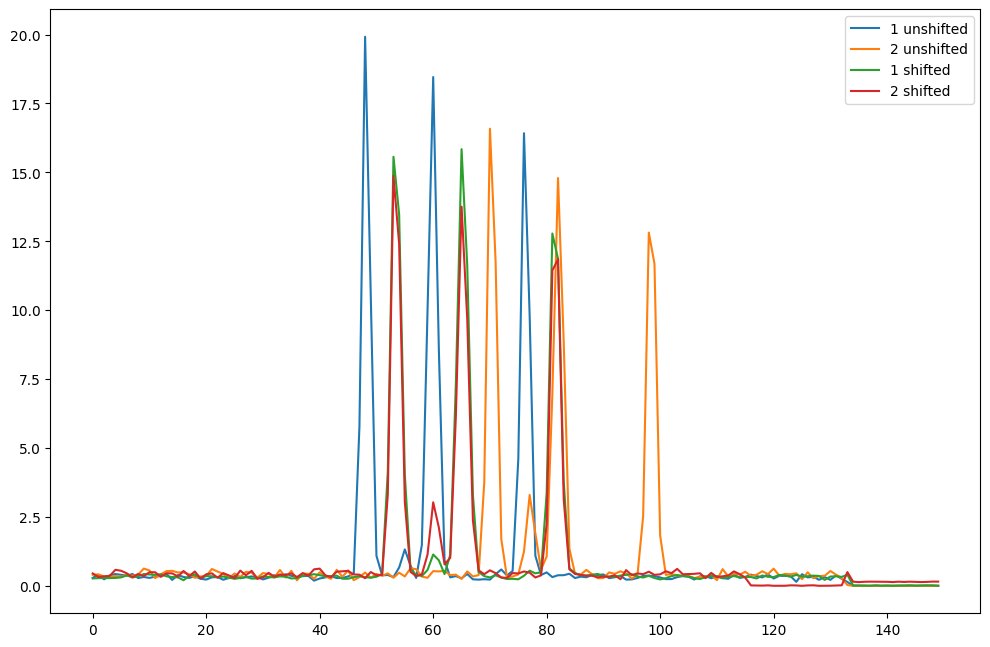

In [38]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# check consistency of peak shift ground truth values
i1, i2 = 4562, 4563
pat1, pat2 = a[i1], a[i2]
qshort = xrdutils.condense(q, 150, False)
shift1, shift2 = scale_vs_train[i1], scale_vs_train[i2]
plt.plot(pat1, label = '1 unshifted')
plt.plot(pat2, label =  '2 unshifted')
plt.plot(xrdutils.mutate_pattern(pat1, -shift1, qshort, scale_type = 'shift', peak_height=False), label = '1 shifted')
plt.plot(xrdutils.mutate_pattern(pat2, -shift2, qshort, scale_type = 'shift', peak_height=False), label = '2 shifted')
plt.legend()

In [18]:
X_train = np.load("data/CoNi_shift_2/train/x.npy")
Y_train = np.load("data/CoNi_shift_2/train/y.npy")

In [8]:
# train_data = torch.tensor(a.astype('float32'))
# train_loader = pv.utils.init_dataloader(train_data.unsqueeze(1), batch_size=64)

train_data = torch.tensor(X_train.astype('float32'))
train_loader = pv.utils.init_dataloader(train_data.unsqueeze(1), batch_size=64)

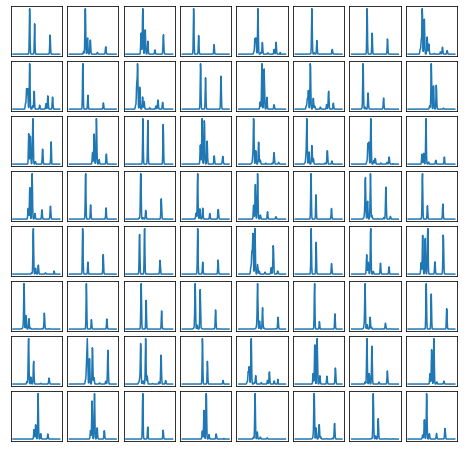

In [9]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

x = torch.linspace(-10, 10, 150)
for ax, (y,) in zip(axes.flat, train_loader):
    ax.plot(x, y[0, 0])

In [10]:
in_dim = (150,)

# Initialize vanilla VAE
vae = pv.models.trVAE(in_dim, latent_dim=2, coord=0, seed=0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(vae)

# Train for n epochs:
for e in range(250):
    trainer.step(train_loader)
    trainer.print_statistics()

Epoch: 1 Training loss: -825.6830
Epoch: 2 Training loss: -1484.1143
Epoch: 3 Training loss: -1591.6704
Epoch: 4 Training loss: -1648.6777
Epoch: 5 Training loss: -1680.8361
Epoch: 6 Training loss: -1700.3067
Epoch: 7 Training loss: -1713.1473
Epoch: 8 Training loss: -1723.4975
Epoch: 9 Training loss: -1731.3440
Epoch: 10 Training loss: -1737.5750
Epoch: 11 Training loss: -1742.6279
Epoch: 12 Training loss: -1747.3900
Epoch: 13 Training loss: -1751.6613
Epoch: 14 Training loss: -1755.4119
Epoch: 15 Training loss: -1758.8291
Epoch: 16 Training loss: -1762.0813
Epoch: 17 Training loss: -1765.1208
Epoch: 18 Training loss: -1768.5294
Epoch: 19 Training loss: -1771.8174
Epoch: 20 Training loss: -1774.5386
Epoch: 21 Training loss: -1777.2094
Epoch: 22 Training loss: -1779.6571
Epoch: 23 Training loss: -1781.8488
Epoch: 24 Training loss: -1784.2489
Epoch: 25 Training loss: -1787.0798
Epoch: 26 Training loss: -1789.2518
Epoch: 27 Training loss: -1791.3951
Epoch: 28 Training loss: -1792.9967
Ep

Epoch: 226 Training loss: -1850.5333
Epoch: 227 Training loss: -1850.2519
Epoch: 228 Training loss: -1850.9443
Epoch: 229 Training loss: -1850.7029
Epoch: 230 Training loss: -1850.8757
Epoch: 231 Training loss: -1850.9150
Epoch: 232 Training loss: -1850.7962
Epoch: 233 Training loss: -1850.8131
Epoch: 234 Training loss: -1851.1982
Epoch: 235 Training loss: -1849.9022
Epoch: 236 Training loss: -1850.7365
Epoch: 237 Training loss: -1851.2011
Epoch: 238 Training loss: -1851.2607
Epoch: 239 Training loss: -1850.7268
Epoch: 240 Training loss: -1851.1657
Epoch: 241 Training loss: -1851.2506
Epoch: 242 Training loss: -1851.1352
Epoch: 243 Training loss: -1851.0940
Epoch: 244 Training loss: -1851.3561
Epoch: 245 Training loss: -1851.4256
Epoch: 246 Training loss: -1848.5409
Epoch: 247 Training loss: -1850.8173
Epoch: 248 Training loss: -1850.6391
Epoch: 249 Training loss: -1851.0249
Epoch: 250 Training loss: -1850.6922


torch.Size([12000, 2])


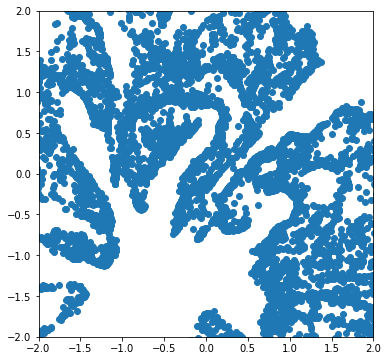

In [12]:
z_mean, z_sd = vae.encode(train_data)
print(z_mean.shape)

plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, -2], z_mean[:, -1])#, s=1
plt.xlim(-2, 2)
plt.ylim(-2, 2);

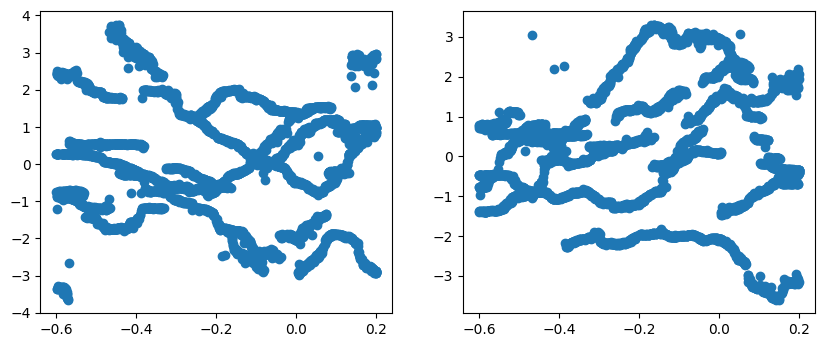

In [44]:
# # Compare real shift and width and VAE parameters

# _, (ax0, ax1) = plt.subplots(1,2, figsize = (10,4))
# ax0.scatter(scale_vs_train, z_mean[:,0])
# ax1.scatter(scale_vs_train, z_mean[:,1])

# # _, (ax0, ax1) = plt.subplots(1,2, figsize = (10,4))
# # ax0.scatter(sig_real, z_mean[:,0])
# # ax1.scatter(sig_real, z_mean[:,1])

In [13]:
# shift invariant VAE
in_dim = (150,)

# Initialize shift-invariant VAE
vae = pv.models.trVAE(in_dim, latent_dim=2, coord=1, seed=0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(vae)

# Train for n epochs:
for e in range(250):
    trainer.step(train_loader)
    trainer.print_statistics()

Epoch: 1 Training loss: -578.6338
Epoch: 2 Training loss: -814.2171
Epoch: 3 Training loss: -1239.9138
Epoch: 4 Training loss: -1568.0714
Epoch: 5 Training loss: -1600.2405
Epoch: 6 Training loss: -1628.5289
Epoch: 7 Training loss: -1654.6552
Epoch: 8 Training loss: -1679.8987
Epoch: 9 Training loss: -1703.0725
Epoch: 10 Training loss: -1726.8935
Epoch: 11 Training loss: -1749.3954
Epoch: 12 Training loss: -1764.0730
Epoch: 13 Training loss: -1771.1912
Epoch: 14 Training loss: -1775.0347
Epoch: 15 Training loss: -1778.4561
Epoch: 16 Training loss: -1781.7957
Epoch: 17 Training loss: -1783.2668
Epoch: 18 Training loss: -1784.1546
Epoch: 19 Training loss: -1785.1092
Epoch: 20 Training loss: -1785.5124
Epoch: 21 Training loss: -1786.6913
Epoch: 22 Training loss: -1786.5935
Epoch: 23 Training loss: -1787.3782
Epoch: 24 Training loss: -1787.9995
Epoch: 25 Training loss: -1788.2203
Epoch: 26 Training loss: -1788.6362
Epoch: 27 Training loss: -1788.7310
Epoch: 28 Training loss: -1789.2109
Epo

Epoch: 226 Training loss: -1827.6286
Epoch: 227 Training loss: -1827.1959
Epoch: 228 Training loss: -1827.8931
Epoch: 229 Training loss: -1827.7297
Epoch: 230 Training loss: -1827.7524
Epoch: 231 Training loss: -1827.5961
Epoch: 232 Training loss: -1827.6280
Epoch: 233 Training loss: -1827.6309
Epoch: 234 Training loss: -1827.4962
Epoch: 235 Training loss: -1827.5152
Epoch: 236 Training loss: -1827.9131
Epoch: 237 Training loss: -1827.3155
Epoch: 238 Training loss: -1828.0451
Epoch: 239 Training loss: -1827.8623
Epoch: 240 Training loss: -1828.0532
Epoch: 241 Training loss: -1827.9385
Epoch: 242 Training loss: -1828.0089
Epoch: 243 Training loss: -1827.3119
Epoch: 244 Training loss: -1827.5580
Epoch: 245 Training loss: -1827.7459
Epoch: 246 Training loss: -1826.6951
Epoch: 247 Training loss: -1828.0168
Epoch: 248 Training loss: -1827.6308
Epoch: 249 Training loss: -1828.1396
Epoch: 250 Training loss: -1827.9189


## Co-Ni toy system: shift-invariant VAE latent space distribution

torch.Size([12000, 3])


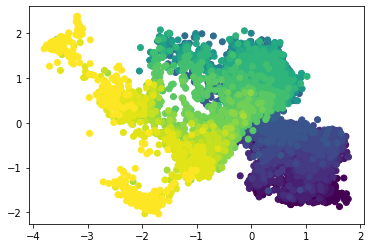

In [20]:
z_mean, z_sd = vae.encode(train_data)
print(z_mean.shape)

plt.scatter(z_mean[:, -2], z_mean[:, -1], c = Y_train)

In [21]:
# plt.figure(figsize=(6, 6))
# plt.scatter(z_mean[:, -2], z_mean[:, -1], s=1)
# plt.xlim(-2, 2)
# plt.ylim(-2, 2);

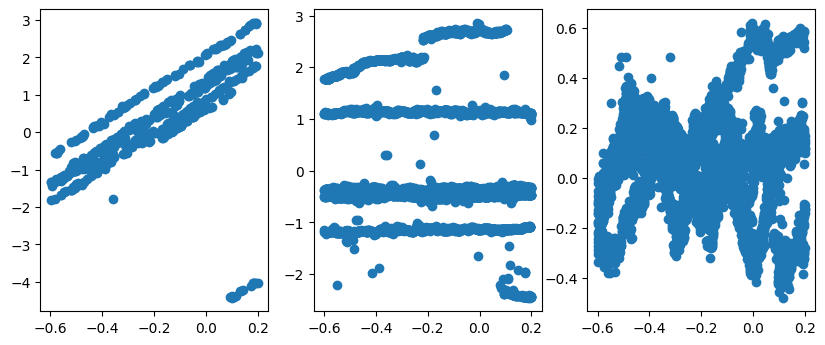

In [61]:
# Compare real shift and width and VAE parameters

_, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (10,4))
ax0.scatter(*resample(scale_vs_train, z_mean[:, 0], n_samples = 500))
#ax0.scatter(scale_vs_train, z_mean[:,0])
ax1.scatter(scale_vs_train, z_mean[:,1])
ax2.scatter(scale_vs_train, z_mean[:,2])

# _, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (10,4))
# ax0.scatter(sig_real, z_mean[:,0])
# ax1.scatter(sig_real, z_mean[:,1])
# ax2.scatter(sig_real, z_mean[:,2])

In [55]:
from scipy.stats import pearsonr
from sklearn.utils import resample

In [67]:
pearsonr(scale_vs_train, z_mean[:, 0])

(0.5904941146793742, 0.0)

In [ ]:
def gaussian(x, mu, sig):
    return torch.exp(-torch.pow(x - mu, 2.) / (2 * torch.pow(sig, 2.)))


def generate_1Dspectra(nsamples: int = 5000) -> torch.Tensor:
    x = torch.linspace(-10, 10, 100)
    dataset = []
    mu_real = []
    sig_real = []
    for _ in range(nsamples):
        noise = torch.randint(1, 100, (1,)) / 1e3
        mu = torch.randint(-30, 30, size=(1,)) / 10
        sig = torch.randint(50, 400, size=(1,)) / 1e2
        g = gaussian(x, mu, sig) + noise * torch.randn(size=(len(x),))
        dataset.append(g[None, ...])
        mu_real.append(mu)
        sig_real.append(sig)
    dataset = torch.cat(dataset)
    mu_real = torch.cat(mu_real)
    sig_real = torch.cat(sig_real)
    dataset = (dataset - dataset.min()) / (dataset.max() - dataset.min())
    return dataset, mu_real, sig_real

# Generate synthetic spectra
train_data, mu_real, sig_real = generate_1Dspectra()
# Initialize dataloader
train_loader = pv.utils.init_dataloader(train_data.unsqueeze(1), batch_size=64)

In [ ]:
train_data.shape

torch.Size([5000, 100])

torch.Size([5000, 150])

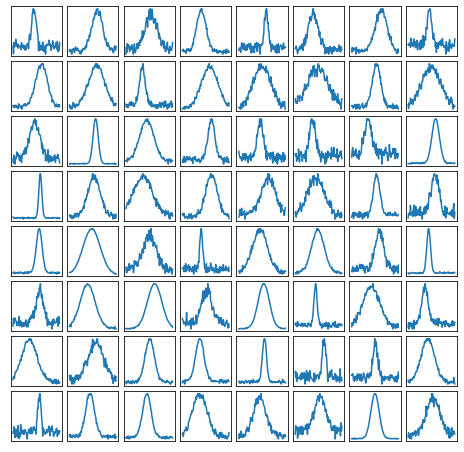

In [ ]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

x = torch.linspace(-10, 10, 100)
for ax, (y,) in zip(axes.flat, train_loader):
    ax.plot(x, y[0, 0])

Train a regular VAE:

In [ ]:
in_dim = (100,)

# Initialize vanilla VAE
vae = pv.models.trVAE(in_dim, latent_dim=2, coord=0, seed=0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(vae)

# Train for n epochs:
for e in range(250):
    trainer.step(train_loader)
    trainer.print_statistics()

Encode the training data into the latent space:

torch.Size([5000, 2])


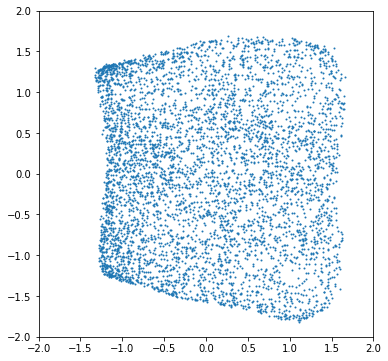

In [ ]:
z_mean, z_sd = vae.encode(train_data)
print(z_mean.shape)

plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, -2], z_mean[:, -1], s=1)
plt.xlim(-2, 2)
plt.ylim(-2, 2);

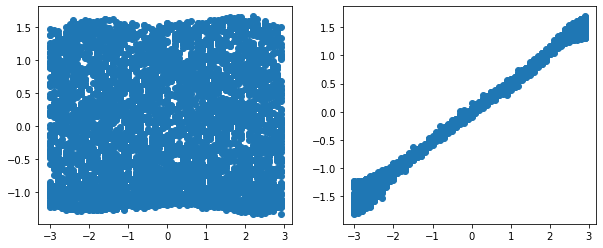

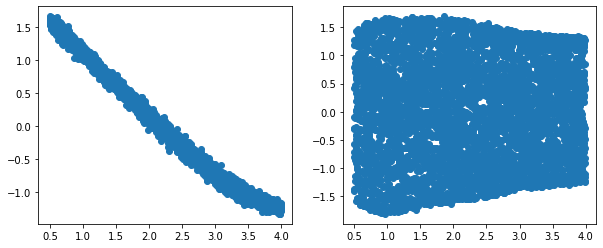

In [ ]:
# Compare real shift and width and VAE parameters

_, (ax0, ax1) = plt.subplots(1,2, figsize = (10,4))
ax0.scatter(mu_real, z_mean[:,0])
ax1.scatter(mu_real, z_mean[:,1])

_, (ax0, ax1) = plt.subplots(1,2, figsize = (10,4))
ax0.scatter(sig_real, z_mean[:,0])
ax1.scatter(sig_real, z_mean[:,1])

Plot the learned manifold:

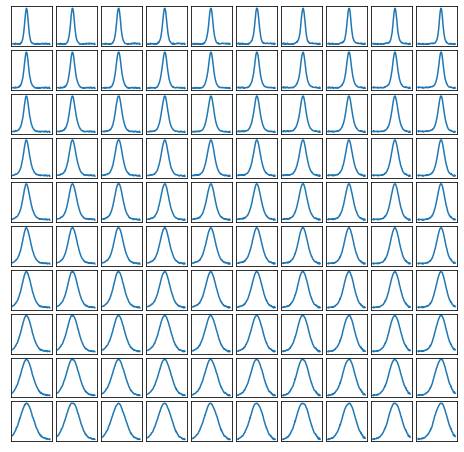

In [ ]:
vae.manifold2d(d=10);

Now train a shift-invariant VAE model (note that ```trVAE``` works both for 2D and 1D cases. For 2D case, ```coord=1``` corresponds to rotational invariance, ```coord=2``` corresponds to translational invariance, and ```coord=3``` - to both. For 1D case, we have only translational invariance so we get the same model for ```coord = 1, 2, 3``` )

In [ ]:
in_dim = (100,)

# Initialize shift-invariant VAE
vae = pv.models.trVAE(in_dim, latent_dim=2, coord=1, seed=0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(vae)

# Train for n epochs:
for e in range(250):
    trainer.step(train_loader)
    trainer.print_statistics()

Encode train data into the latent space:

torch.Size([5000, 3])


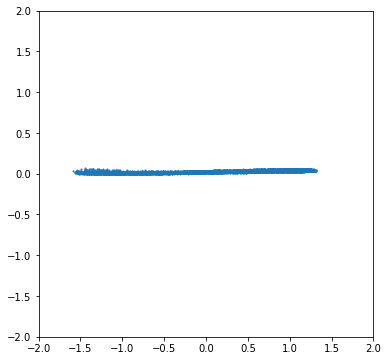

In [ ]:
z_mean, z_sd = vae.encode(train_data)
print(z_mean.shape)

plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, -2], z_mean[:, -1], s=1)
plt.xlim(-2, 2)
plt.ylim(-2, 2);

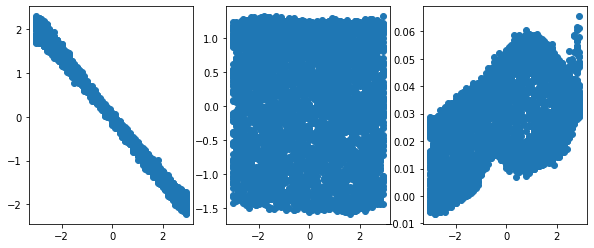

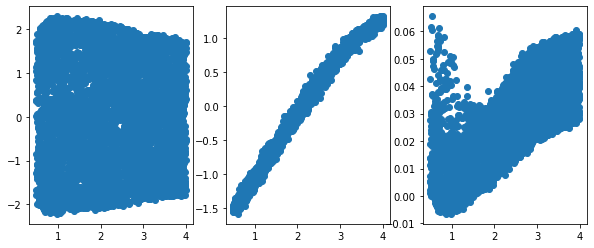

In [ ]:
# Compare real shift and width and VAE parameters

_, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (10,4))
ax0.scatter(mu_real, z_mean[:,0])
ax1.scatter(mu_real, z_mean[:,1])
ax2.scatter(mu_real, z_mean[:,2])

_, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (10,4))
ax0.scatter(sig_real, z_mean[:,0])
ax1.scatter(sig_real, z_mean[:,1])
ax2.scatter(sig_real, z_mean[:,2])

Plot the learned manifold:

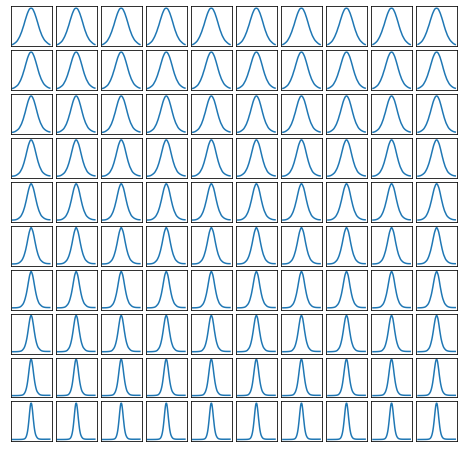

In [ ]:
vae.manifold2d(d=10);